In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import random

# Read the data from the CSV file
file_path = "Heart_Failure.csv"
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('DEATH_EVENT', axis=1)  # Assuming 'DEATH_EVENT' is the target column
y = data['DEATH_EVENT']

# Assuming 'data' is your DataFrame and 'DEATH_EVENT' is the column you want to modify
# Replace 'data' and 'DEATH_EVENT' with your actual DataFrame and column name

# Find indices where 'DEATH_EVENT' column has value 0
zero_indices = data.index[data['DEATH_EVENT'] == 0].tolist()

# Randomly select 97 indices of value 0
indices_to_remove = random.sample(zero_indices, 97)

# Drop the rows based on the selected indices
data.drop(indices_to_remove, inplace=True)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the KNN model: {accuracy * 100:.2f}%")

Accuracy of the KNN model: 53.33%


In [46]:
print(data.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


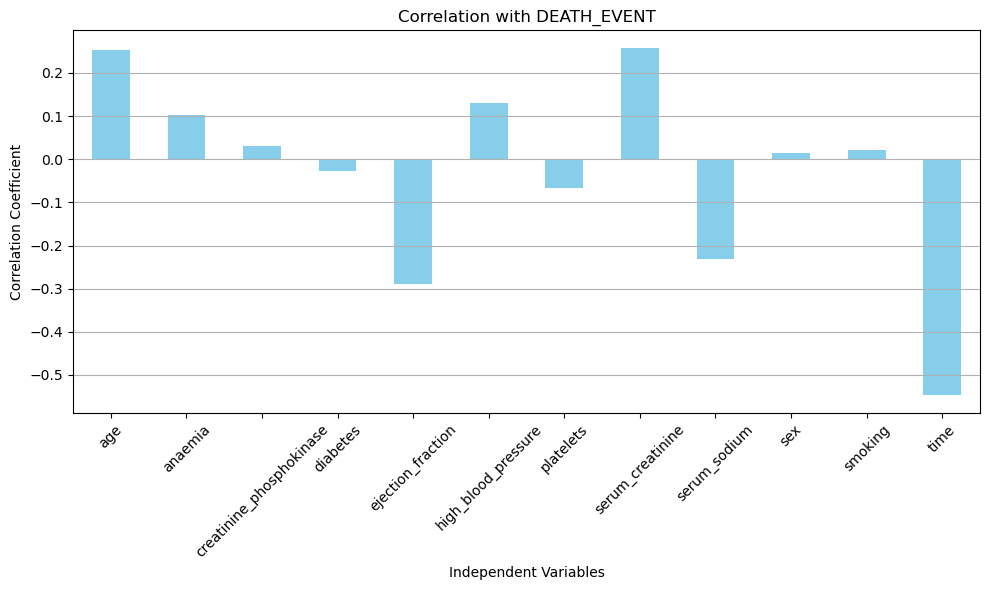

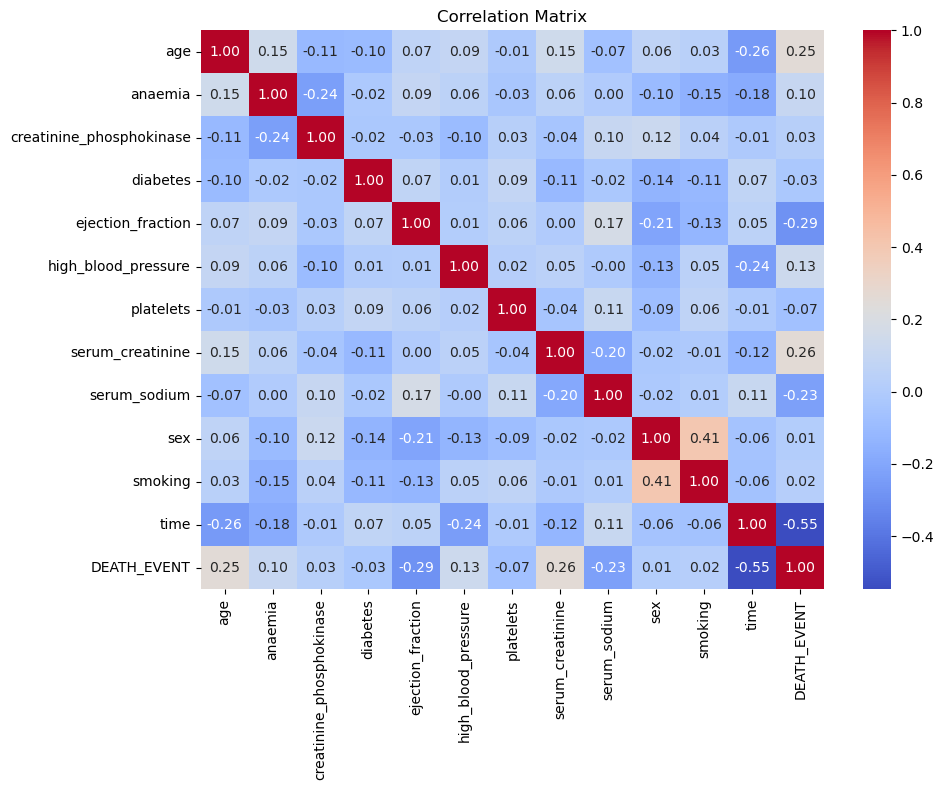

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Correlation of independent variables with the dependent variable ('DEATH_EVENT')
correlation_with_death_event = correlation_matrix['DEATH_EVENT'].drop('DEATH_EVENT') # Dropping the correlation with itself

# Plotting correlation coefficients
plt.figure(figsize=(10, 6))
correlation_with_death_event.plot(kind='bar', color='skyblue')
plt.title('Correlation with DEATH_EVENT')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [48]:
correlation_time_death = data['time'].corr(data['DEATH_EVENT'])
print(f"Correlation between 'time' and 'DEATH_EVENT': {correlation_time_death}")

Correlation between 'time' and 'DEATH_EVENT': -0.5475698163928229


In [49]:
threshold = 0.19
columns_over_threshold = correlation_with_death_event[(correlation_with_death_event > threshold) | (correlation_with_death_event < -threshold)]

print("Columns with correlation over 0.24 or less than -0.24 with 'DEATH_EVENT':")
print(columns_over_threshold)

Columns with correlation over 0.24 or less than -0.24 with 'DEATH_EVENT':
age                  0.253105
ejection_fraction   -0.289648
serum_creatinine     0.258546
serum_sodium        -0.230820
time                -0.547570
Name: DEATH_EVENT, dtype: float64


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset

# Selecting columns with high correlation
selected_columns = ['age', 'ejection_fraction', 'serum_creatinine', 'time']
subset_data = data[selected_columns]

# Separating features and target variable
X_subset = subset_data
y = data['DEATH_EVENT']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

# Creating a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the classifier to the training data
knn.fit(X_train, y_train)

# Making predictions on the test data
train_predictions = knn.predict(X_train)

# Calculating accuracy on the training data
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Accuracy of the KNN model on training data: {train_accuracy * 100:.2f}%")

# Making predictions on the test data
test_predictions = knn.predict(X_test)

# Calculating accuracy on the test data
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy of the KNN model on testing data: {test_accuracy * 100:.2f}%")


Accuracy of the KNN model on training data: 81.99%
Accuracy of the KNN model on testing data: 78.05%


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'knn' is your trained KNN model
# Assuming 'X_test', 'y_test' are your test features and labels

# Making predictions on the test data
predictions = knn.predict(X_test)

# Classification report
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.75      0.67      0.71        18

    accuracy                           0.76        41
   macro avg       0.76      0.75      0.75        41
weighted avg       0.76      0.76      0.75        41


Confusion Matrix:
[[19  4]
 [ 6 12]]
